In [1]:
#connect to google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
#major imports
import pandas
import numpy as np
import sklearn

In [3]:
#import data
df = pandas.read_csv('/content/drive/MyDrive/bodyfat.csv')

In [4]:
df.head()

,Density,BodyFat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
0,1.0708,12.3,23,154.25,67.75,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1
1,1.0853,6.1,22,173.25,72.25,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2
2,1.0414,25.3,22,154.00,66.25,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6
3,1.0751,10.4,26,184.75,72.25,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2
4,1.0340,28.7,24,184.25,71.25,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7


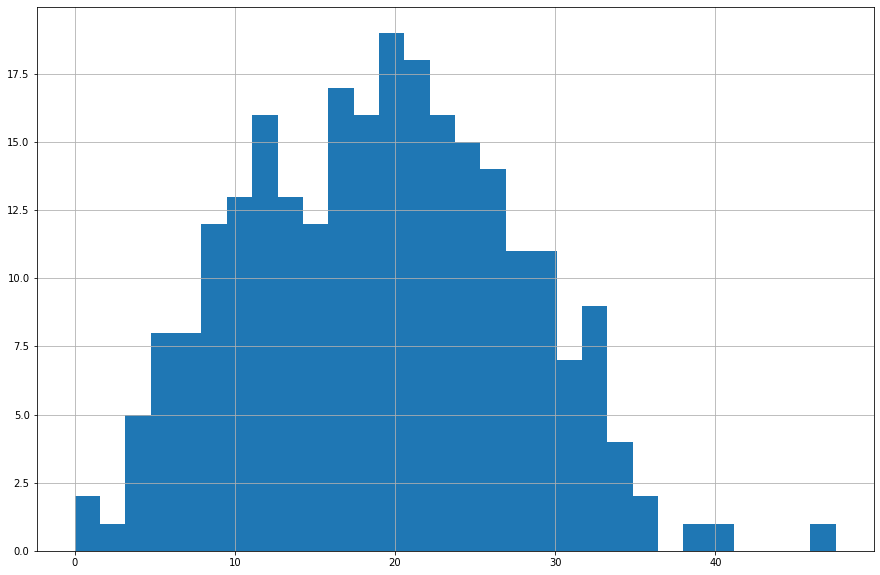

In [5]:
df['BodyFat'].hist(bins=30, figsize=(15, 10))

In [6]:
from sklearn.model_selection import train_test_split
X = df.drop(columns=['BodyFat'])
y = df['BodyFat']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75)

In [7]:
len(y)

252

In [8]:
#baseline linear regression model
from sklearn.linear_model import LinearRegression
lr = LinearRegression()


In [9]:
#20 fold cv
from sklearn.model_selection import cross_val_score
scores = cross_val_score(lr, X, y, cv=20)
print(scores)
print(f"Mean Accuracy: {np.mean(scores)}")
print(f"Std: {np.std(scores)}")

[0.9945235  0.9920098  0.99612867 0.95623739 0.99867024 0.96858177
 0.98245364 0.19916359 0.98543487 0.99529295 0.97511524 0.99754105
 0.99545026 0.99759678 0.9815012  0.99335812 0.99402146 0.99387295
 0.99085995 0.9957109 ]
Mean Accuracy: 0.9491762164444859
Std: 0.1724015910141823


In [10]:
print(X)
print(y)

     Density  Age  Weight  Height  Neck  ...  Knee  Ankle  Biceps  Forearm  Wrist
0     1.0708   23  154.25   67.75  36.2  ...  37.3   21.9    32.0     27.4   17.1
1     1.0853   22  173.25   72.25  38.5  ...  37.3   23.4    30.5     28.9   18.2
2     1.0414   22  154.00   66.25  34.0  ...  38.9   24.0    28.8     25.2   16.6
3     1.0751   26  184.75   72.25  37.4  ...  37.3   22.8    32.4     29.4   18.2
4     1.0340   24  184.25   71.25  34.4  ...  42.2   24.0    32.2     27.7   17.7
..       ...  ...     ...     ...   ...  ...   ...    ...     ...      ...    ...
247   1.0736   70  134.25   67.00  34.9  ...  34.8   21.5    25.6     25.7   18.5
248   1.0236   72  201.00   69.75  40.9  ...  40.8   23.2    35.2     28.6   20.1
249   1.0328   72  186.75   66.00  38.9  ...  37.3   21.5    31.3     27.2   18.0
250   1.0399   72  190.75   70.50  38.9  ...  41.6   22.7    30.5     29.4   19.8
251   1.0271   74  207.50   70.00  40.8  ...  42.2   24.6    33.7     30.0   20.9

[252 rows x 14 

In [11]:
#LOOCV
from sklearn.model_selection import LeaveOneOut
from sklearn.metrics import r2_score, mean_squared_error
from matplotlib import pyplot as plt 
def loocv(X ,y, estimator):
  cv = LeaveOneOut()
  y_true, y_pred = [], []
  for train_idx, test_idx in cv.split(X):
    #print(train_idx)
    #print(test_idx)
    X_train, X_test = X.iloc[train_idx, :].values, X.iloc[test_idx, :].values
    y_train, y_test = y.iloc[train_idx].values, y.iloc[test_idx].values
    estimator.fit(X_train, y_train)
    yhat = estimator.predict(X_test)
    y_true.append(y_test[0])
    y_pred.append(yhat[0])

  
  
  scores = (np.array(y_true) - np.array(y_pred)) ** 2
  hist, bins = np.histogram(scores, bins=30)
  plt.hist(hist, bins=bins)
  plt.show()
  scores_n_outlier = scores[np.where(scores < 50)] #remove outlier MSE
  print(scores[np.where(scores > 50)])

  print("R^2: " + str(r2_score(y_pred, y_true)))
  #print(scores)
  print("MSE(mean): " + str(np.mean(scores)))
  print("MSE(std): " + str(np.std(scores)))
  print("CI (95%): " + str(1.96 * np.std(scores)))

  print("MSE(mean (no outlier)): " + str(np.mean(scores_n_outlier)))
  print("MSE(std (no outlier)): " + str(np.std(scores_n_outlier)))
  print("CI (95%):  " + str(1.96 * np.std(scores_n_outlier)))

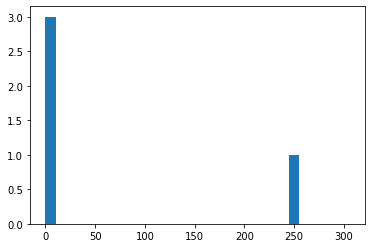

[ 76.03957069 305.85000387]
R^2: 0.972024907871995
MSE(mean): 1.9149040552817538
MSE(std): 19.837370091667278
CI (95%): 38.88124537966787
MSE(mean (no outlier)): 0.402664989478171
MSE(std (no outlier)): 1.702501325422355
CI (95%):  3.336902597827816


In [12]:
loocv(X, y, lr)

In [13]:
#baseline xgboost
from sklearn.ensemble import GradientBoostingRegressor
gb = GradientBoostingRegressor()
scores = cross_val_score(gb, X, y, cv=20)
print(scores)
print(f"Mean Accuracy: {np.mean(scores)}")
print(f"Std: {np.std(scores)}")

[0.97032373 0.97671571 0.99549598 0.93966033 0.99360158 0.96033536
 0.99911273 0.29564374 0.99869747 0.99968917 0.99834461 0.98835158
 0.98901439 0.98705905 0.97092007 0.99900188 0.95349617 0.99878109
 0.99752508 0.99825211]
Mean Accuracy: 0.9505010920408434
Std: 0.15120552115733982


In [14]:
#gridsearchCV
from sklearn.model_selection import GridSearchCV
gbm = GradientBoostingRegressor()
params = {
    'max_depth': [1, 2, 3, 4, 5],
    'n_estimators':[25, 50, 100, 200]
}
search = GridSearchCV(cv=20, param_grid=params, estimator=gbm)
search.fit(X, y)

GridSearchCV(cv=20, estimator=GradientBoostingRegressor(),
             param_grid={'max_depth': [1, 2, 3, 4, 5],
                         'n_estimators': [25, 50, 100, 200]})

In [15]:
search.best_params_

{'max_depth': 2, 'n_estimators': 50}

In [16]:
scores = cross_val_score(search.best_estimator_, X, y, cv=20)
print(scores)
print(f"Mean Accuracy: {np.mean(scores)}")
print(f"Std: {np.std(scores)}")

[0.98404264 0.9937036  0.99378568 0.93913256 0.99814698 0.93953872
 0.99823368 0.35030765 0.99751174 0.99867945 0.99421653 0.98895084
 0.99862936 0.97765776 0.96870696 0.99751311 0.94586198 0.99712309
 0.99905061 0.99662363]
Mean Accuracy: 0.9528708272254056
Std: 0.13963851586599382


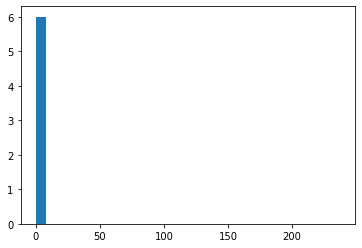

[ 90.29576255 237.52662016  82.82478496]
R^2: 0.9654520840624068
MSE(mean): 2.245915630089999
MSE(std): 17.10446340747679
CI (95%): 33.524748278654506
MSE(mean (no outlier)): 0.6237894422288198
MSE(std (no outlier)): 3.7319099166112117
CI (95%):  7.314543436557975


In [17]:
loocv(X, y, search.best_estimator_)

In [18]:
from sklearn.preprocessing import StandardScaler, RobustScaler, Normalizer, MinMaxScaler
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsRegressor
from sklearn.decomposition import PCA

pipe = Pipeline([('scaler', MinMaxScaler()), ('knn', KNeighborsRegressor())])
params = {
    'knn__n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15],
    'knn__metric': ['euclidean', 'manhattan', 'minkowski'],
    'knn__weights': ['uniform', 'distance']
}
pipe.get_params().keys()
search = GridSearchCV(cv=20, param_grid=params, estimator=pipe)
search.fit(X, y)

GridSearchCV(cv=20,
             estimator=Pipeline(steps=[('scaler', MinMaxScaler()),
                                       ('knn', KNeighborsRegressor())]),
             param_grid={'knn__metric': ['euclidean', 'manhattan', 'minkowski'],
                         'knn__n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15],
                         'knn__weights': ['uniform', 'distance']})

In [19]:
search.best_params_

{'knn__metric': 'euclidean', 'knn__n_neighbors': 5, 'knn__weights': 'distance'}

In [20]:
scores = cross_val_score(search.best_estimator_, X, y, cv=20)
print(scores)
print(f"Mean Accuracy: {np.mean(scores)}")
print(f"Std: {np.std(scores)}")

[0.64040167 0.75212218 0.89943309 0.92171078 0.88194013 0.82549636
 0.41102288 0.88843762 0.57962876 0.8227252  0.44727527 0.94354819
 0.77100495 0.86735508 0.91434934 0.84994658 0.84020946 0.84588379
 0.83522724 0.74775318]
Mean Accuracy: 0.7842735880167263
Std: 0.147774834044069


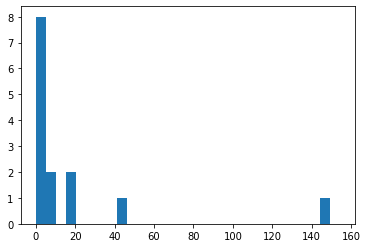

[ 61.83072345  52.20021177  93.76294965 154.43704849]
R^2: 0.8138780610352806
MSE(mean): 8.584853367229837
MSE(std): 14.95129171910962
CI (95%): 29.304531769454854
MSE(mean (no outlier)): 7.262710141824531
MSE(std (no outlier)): 9.553172635096239
CI (95%):  18.724218364788626


In [21]:
loocv(X, y, search.best_estimator_)

In [22]:
from sklearn.ensemble import RandomForestRegressor
rfc = RandomForestRegressor()
params = {
    'max_depth': [1, 2, 3, 4, 5, None],
    'n_estimators':[10, 25, 50, 100, 200]
}
search = GridSearchCV(cv=20, param_grid=params, estimator=rfc)
search.fit(X, y)


GridSearchCV(cv=20, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [1, 2, 3, 4, 5, None],
                         'n_estimators': [10, 25, 50, 100, 200]})

In [23]:
search.best_params_

{'max_depth': None, 'n_estimators': 100}

In [24]:
scores = cross_val_score(search.best_estimator_, X, y, cv=20)
print(scores)
print(f"Mean Accuracy: {np.mean(scores)}")
print(f"Std: {np.std(scores)}")

[0.99257083 0.9902384  0.9953554  0.94267646 0.99937792 0.93782115
 0.99831865 0.41597421 0.99886805 0.99979637 0.99879949 0.985524
 0.99094395 0.98120704 0.98945257 0.99912135 0.93107234 0.99747837
 0.99939214 0.99801417]
Mean Accuracy: 0.957100142854191
Std: 0.12592197101174402


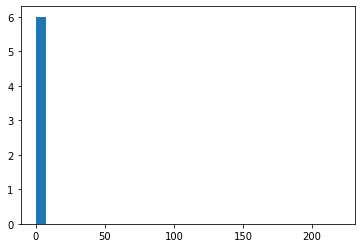

[ 95.433361 220.344336 103.388224]
R^2: 0.9693967423776446
MSE(mean): 2.077291369047622
MSE(std): 16.568726457433673
CI (95%): 32.474703856569995
MSE(mean (no outlier)): 0.4189217028112449
MSE(std (no outlier)): 2.744222570220434
CI (95%):  5.3786762376320505


In [25]:
loocv(X, y, search.best_estimator_)

In [26]:
from sklearn.ensemble import ExtraTreesRegressor
ext = ExtraTreesRegressor()
params = {
    'max_depth': [1, 2, 3, 4, 5, None],
    'n_estimators':[10, 25, 50, 100, 200, 300, 400]
}
search = GridSearchCV(cv=20, param_grid=params, estimator=ext)
search.fit(X, y)

GridSearchCV(cv=20, estimator=ExtraTreesRegressor(),
             param_grid={'max_depth': [1, 2, 3, 4, 5, None],
                         'n_estimators': [10, 25, 50, 100, 200, 300, 400]})

In [27]:
search.best_params_

{'max_depth': None, 'n_estimators': 100}

In [28]:
scores = cross_val_score(search.best_estimator_, X, y, cv=20)
print(scores)
print(f"Mean Accuracy: {np.mean(scores)}")
print(f"Std: {np.std(scores)}")

[0.98664732 0.98483363 0.99950635 0.94131724 0.99975427 0.94721658
 0.9974673  0.68601392 0.99817372 0.99927152 0.99535441 0.99729318
 0.99083327 0.99058199 0.99338329 0.99694266 0.94872576 0.99658691
 0.99857348 0.99675338]
Mean Accuracy: 0.972261509030883
Std: 0.06810120136362863


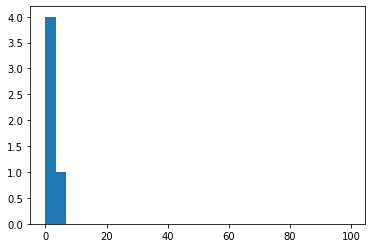

[92.640625 99.620361 78.730129]
R^2: 0.9793488263328065
MSE(mean): 1.3889359166666686
MSE(std): 10.038103231308725
CI (95%): 19.6746823333651
MSE(mean (no outlier)): 0.31735235341365325
MSE(std (no outlier)): 2.147696842061264
CI (95%):  4.209485810440078


In [29]:
loocv(X, y, search.best_estimator_)

In [30]:
from sklearn.ensemble import AdaBoostRegressor
ada = AdaBoostRegressor()
params = {
    'n_estimators':[10, 25, 50, 100, 200],
    'learning_rate': [0.25, 0.5, 1, 2]
}
search = GridSearchCV(cv=20, param_grid=params, estimator=ada)
search.fit(X, y)

GridSearchCV(cv=20, estimator=AdaBoostRegressor(),
             param_grid={'learning_rate': [0.25, 0.5, 1, 2],
                         'n_estimators': [10, 25, 50, 100, 200]})

In [31]:
search.best_params_

{'learning_rate': 0.25, 'n_estimators': 25}

In [32]:
scores = cross_val_score(search.best_estimator_, X, y, cv=20)
print(scores)
print(f"Mean Accuracy: {np.mean(scores)}")
print(f"Std: {np.std(scores)}")

[0.93506671 0.94295427 0.97500724 0.93539699 0.99069568 0.85010897
 0.97548564 0.54735607 0.96044969 0.97821622 0.955864   0.97920805
 0.98178972 0.95132347 0.94722344 0.98113675 0.92650811 0.97965498
 0.98978433 0.98715067]
Mean Accuracy: 0.93851905057689
Std: 0.09514663985160693


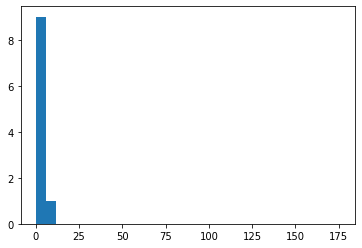

[100.6009      50.00510204 175.84654337 133.50752066]
R^2: 0.9448146714324029
MSE(mean): 3.5680439350433857
MSE(std): 16.005691209669706
CI (95%): 31.371154770952625
MSE(mean (no outlier)): 1.7709153450065034
MSE(std (no outlier)): 4.760819226287093
CI (95%):  9.331205683522702


In [33]:
loocv(X, y, search.best_estimator_)

In [34]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor()
params = {
    'max_depth': [1, 2, 3, 5, 8, None]
}
search = GridSearchCV(cv=20, param_grid=params, estimator=dt)
search.fit(X, y)

GridSearchCV(cv=20, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [1, 2, 3, 5, 8, None]})

In [35]:
search.best_params_

{'max_depth': 8}

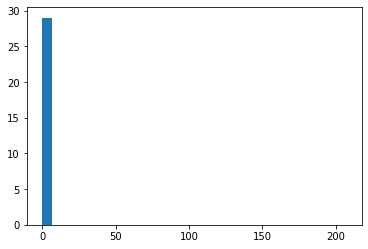

[ 54.76 100.   207.36  73.96  88.36  88.36]
R^2: 0.9605747911496267
MSE(mean): 2.8508374142911133
MSE(std): 17.429833337659552
CI (95%): 34.16247334181272
MSE(mean (no outlier)): 0.42931312358276646
MSE(std (no outlier)): 2.4513274677521846
CI (95%):  4.804601836794282


In [36]:
loocv(X, y, search.best_estimator_)

In [37]:
scores = cross_val_score(search.best_estimator_, X, y, cv=20)
print(scores)
print(f"Mean Accuracy: {np.mean(scores)}")
print(f"Std: {np.std(scores)}")

[0.75747806 0.95017285 0.96772606 0.94389878 0.99871813 0.96112168
 0.96116945 0.26743056 0.99318152 0.99777471 0.9933131  0.9989524
 0.99758645 0.9905707  0.98739603 0.99727027 0.94487726 0.99962263
 0.99823738 0.99724642]
Mean Accuracy: 0.9351872222668283
Std: 0.16195080736424275
